<a href="https://colab.research.google.com/github/anandk16/Test/blob/main/LayoutParser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install layoutparser


In [2]:
!pip3 install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-i_vnrvvz/detectron2_ca269571c1be4bd0b450c90a4526ee73
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-i_vnrvvz/detectron2_ca269571c1be4bd0b450c90a4526ee73
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [4]:
!chmod 777 /usr/share/tesseract-ocr

In [5]:
!pip install pytesseract
import pytesseract





In [6]:
#pytesseract.pytesseract.tesseract_cmd = r'/usr/share/tesseract-ocr'

In [7]:
!pip install layoutparser[ocr]

In [8]:
import layoutparser as lp
import cv2

In [9]:
image = cv2.imread("image.png")
image = image[..., ::-1]


In [10]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

In [28]:
layout = model.detect(image)

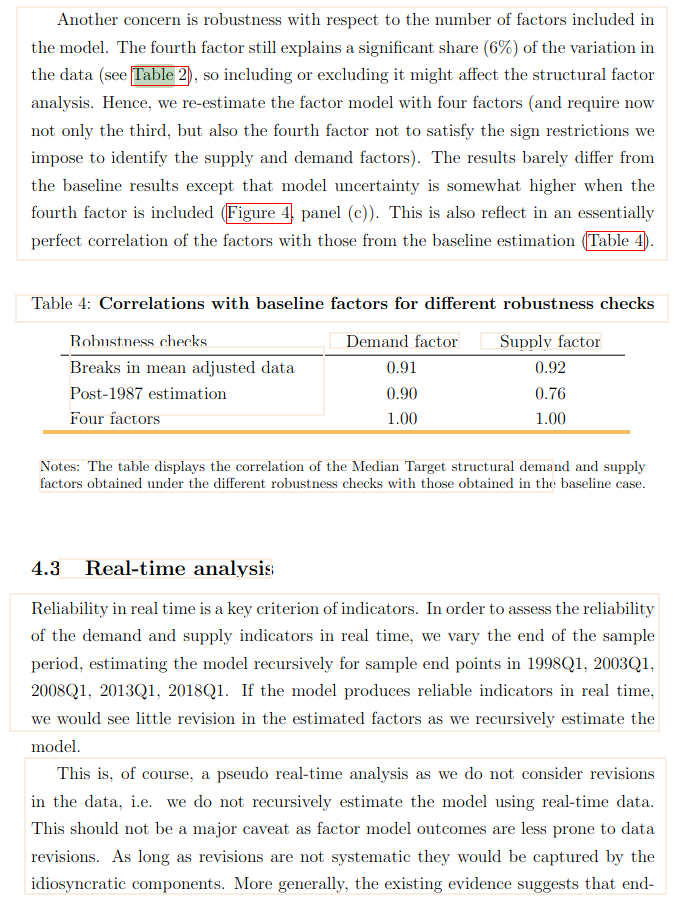

In [38]:
lp.draw_box(image, layout, box_width=2)

In [13]:
all_text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [14]:
text_blocks = lp.Layout([b for b in all_text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])


In [15]:
h, w = image.shape[:2]

In [16]:
left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

In [17]:
left_blocks = text_blocks.filter_by(left_interval, center=True)

In [18]:
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

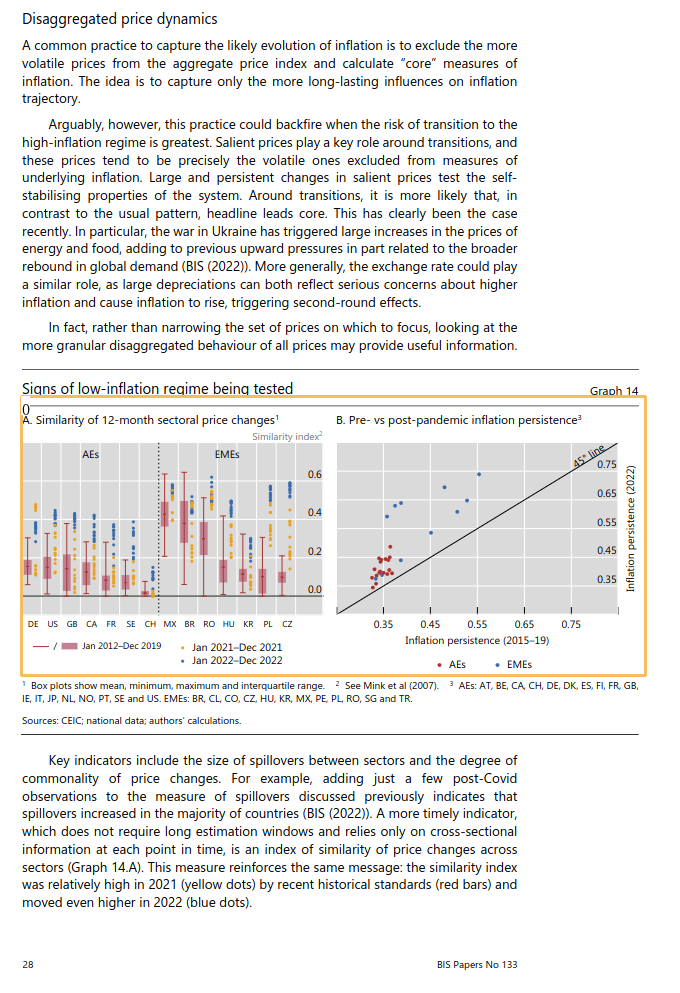

In [19]:
lp.draw_box(image, figure_blocks,
            box_width=3,
            show_element_id=True)

In [20]:
ocr_agent = lp.TesseractAgent(languages='eng')




In [25]:
for block in figure_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)


In [26]:
for txt in figure_blocks.get_texts():
    print(txt, end='\n---\n')

   

rr as

 

 

A Similarity of 12-month sectoral price changes"

Simitarity inde

Aes EMEs

06

  

    

Inflation persistence (2022)

 

1 1 1 1 1 1
DE US GE CA FR SE CH Mx BR RO MU KR PLZ 035 «04S OSS 06s 7S,

mmr Jan 2012-Dec2019 «Jan 2021-Dec 2021 Inflation persistence (2015-19)
+ Jan 2022-Dec 2022

 

+ AES + EMEs

---




```
# This is formatted as code
```

# Parsing tables

In [31]:
table_image = cv2.imread("table.png")
table_image = image[..., ::-1]

In [42]:
table_model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_50_FPN_3x/config',
                                extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                label_map={0: "Table"})

# table_model = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
#                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
#                                 label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"})



In [43]:
table_layout = table_model.detect(table_image)

In [45]:
table_layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=54.819339752197266, y_1=343.4955139160156, x_2=625.9788818359375, y_2=430.7994079589844), text=None, id=None, type=Table, parent=None, next=None, score=0.8744556903839111)], page_data={})

In [ ]:
lp.draw_box(table_image, table_layout, box_width=2)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng')

for block in figure_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

